### Smoothing - Moving Average

In [333]:
import numpy as np
import matplotlib.pyplot as plt
import random
from statsmodels.graphics.tsaplots import plot_acf

x50 = np.loadtxt('x50.csv', delimiter=',')

w = np.empty(10000,dtype=float) 

for i in range (10000):
	w[i] = random.uniform(-1, 1) 
        
signal = np.empty(10000,dtype=float)
for i in range(10000):
    if i == 0:
        signal[0] = 0 
    else: 
        signal[i] = -0.8 * x50[i] + 30 * w[i]



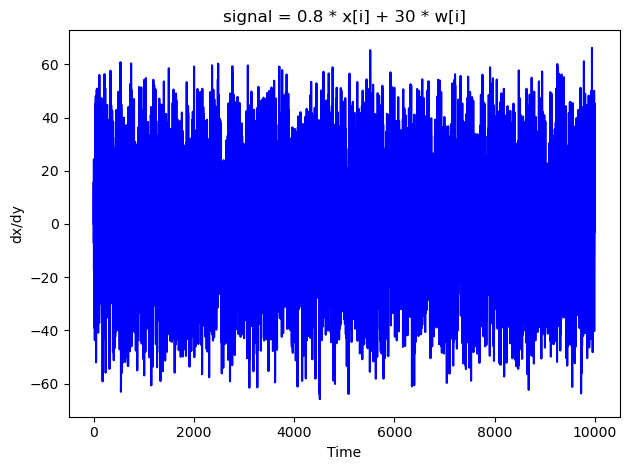

In [349]:
x = range(len(signal))
plt.title("signal = 0.8 * x[i] + 30 * w[i]")
plt.xlabel("Time")
plt.ylabel("dx/dy")
plt.plot(x,signal,color="blue")
plt.show()

In [350]:
import statistics 

print('Mean value for signal: %d' % statistics.mean(signal))
print('Variance value for signal: %d' % statistics.variance(signal))

Mean value for signal: 0
Variance value for signal: 539


### α = β + γ, β = onstein γ = noise(w)

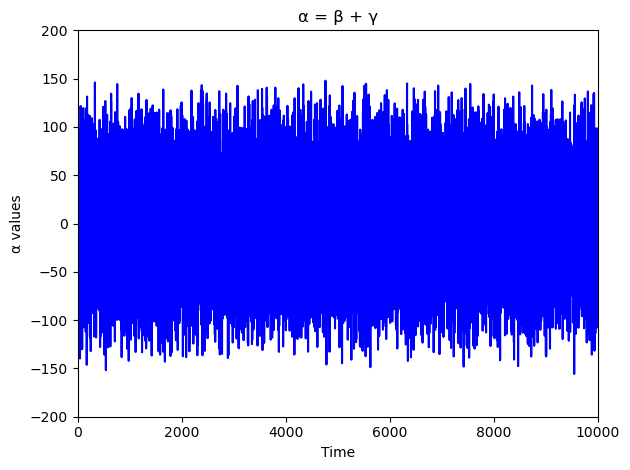

In [351]:
g = np.empty(10000, dtype = float)
a = np.empty(10000, dtype = float)
smoothed_signal = np.empty(10000, dtype = float)

for i in range (10000):
	g[i] = random.uniform(-100, 100) 

	
for i in range (10000):
	if i == 0:
		a[i] = 0
	else:
		a[i] = signal[i] + g[i]
	
x = range(len(a))
plt.title("α = β + γ")
plt.xlabel("Time")
plt.ylabel("α values")
plt.plot(x,a, color="blue")
plt.axis([0, 10000, -200, 200])
plt.show()    



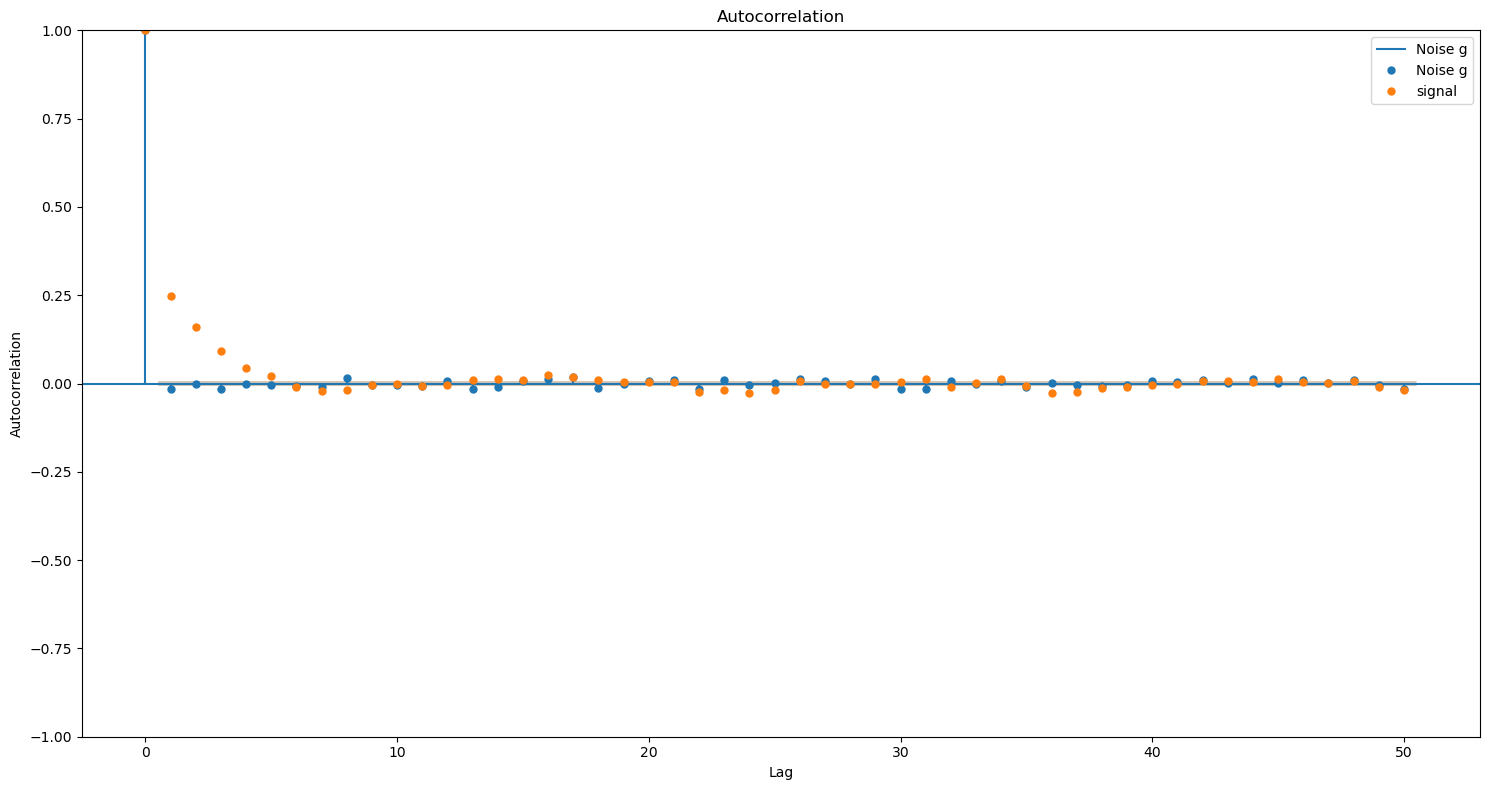

In [352]:

fig, ax = plt.subplots(figsize=(15, 8))

plot_acf(g, lags=50, ax=ax, alpha=0.5, title='Autocorrelation Functions', label = "Noise g")
ax.set_ylabel('Autocorrelation')
ax.set_xlabel('Lag')

plot_acf(signal, lags=50, ax=ax, alpha=0.5, use_vlines=False, label = "signal")
ax.legend()
 
plt.show()


In [353]:
print('Mean value for a: %d' % statistics.mean(a))
print('Variance for a: %d' % statistics.variance(a))

Mean value for a: 0
Variance for a: 3876


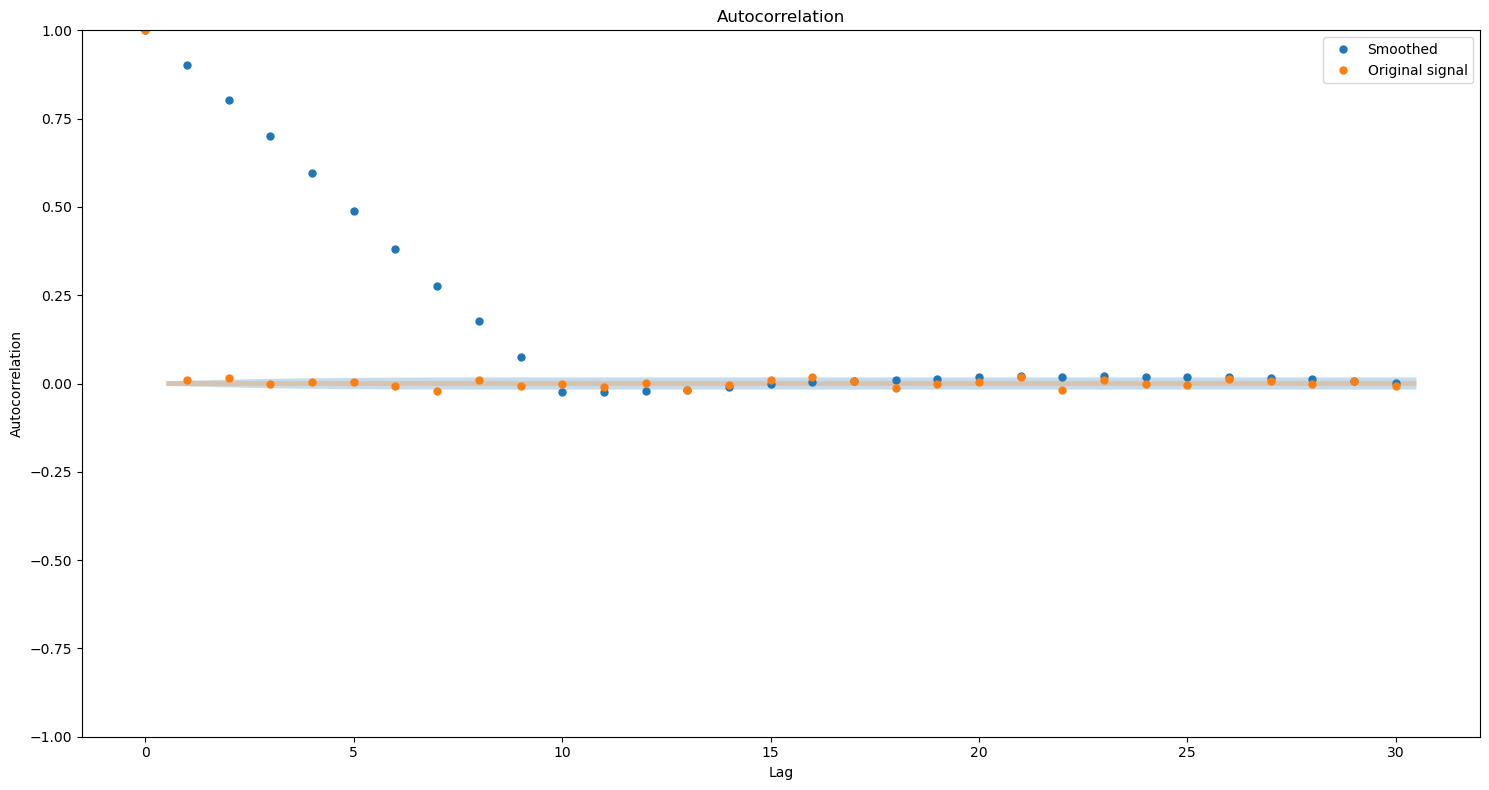

In [354]:
ws = 10
smoothed_signal = np.convolve(a, np.ones(ws) / ws, mode='valid')

fig, ax = plt.subplots(figsize=(15, 8))

plot_acf(smoothed_signal, lags=30, ax=ax, use_vlines=False, alpha=0.5, title='Autocorrelation Functions', label = "Smoothed")
ax.set_ylabel('Autocorrelation')
ax.set_xlabel('Lag')

plot_acf(a, lags=30, ax=ax, alpha=0.5, use_vlines=False, label = "Original signal")
ax.legend()

plt.show()



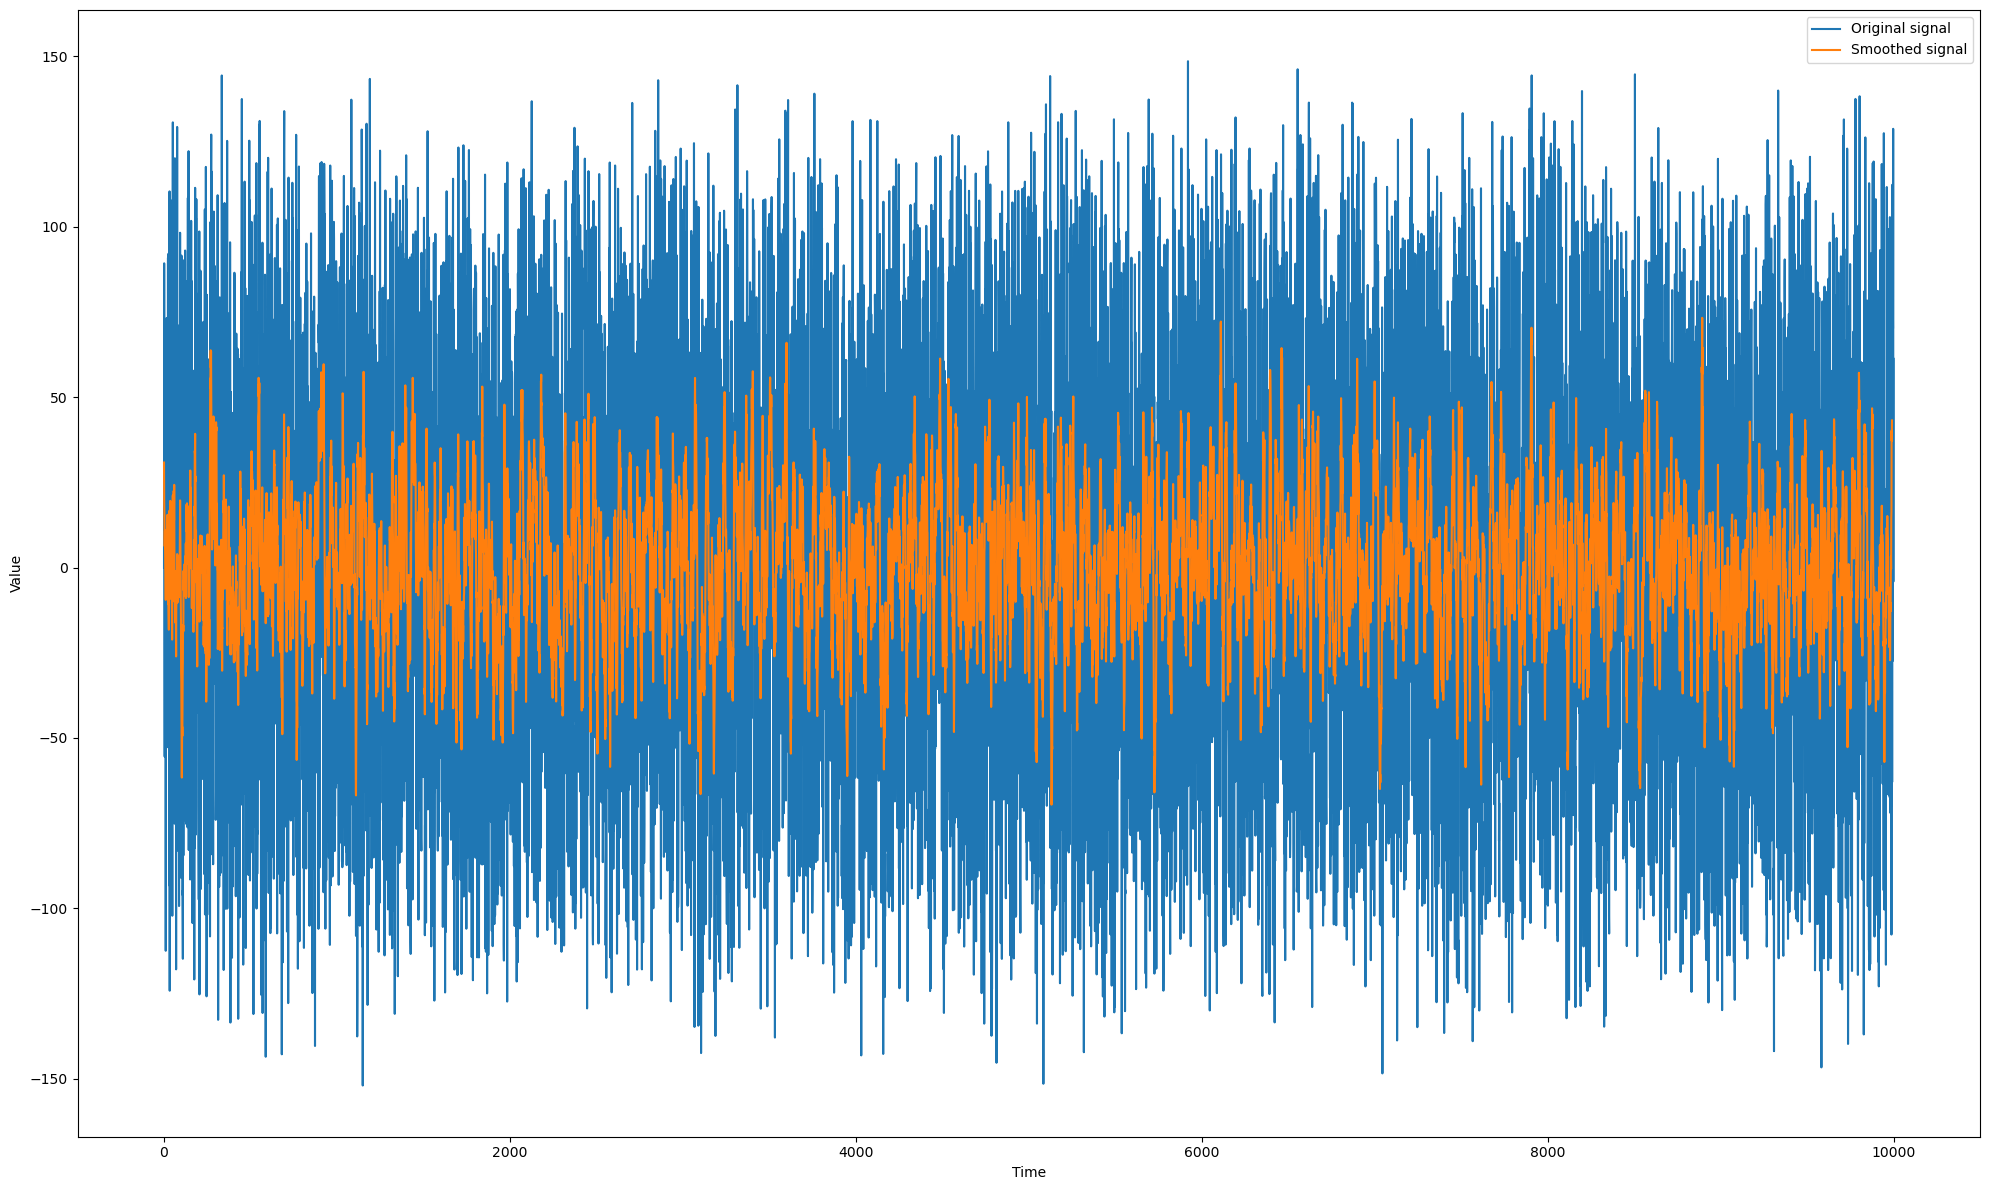

In [340]:
plt.figure(figsize=(20, 12))
plt.plot(a, label='Original signal')
plt.plot(smoothed_signal, label='Smoothed signal')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

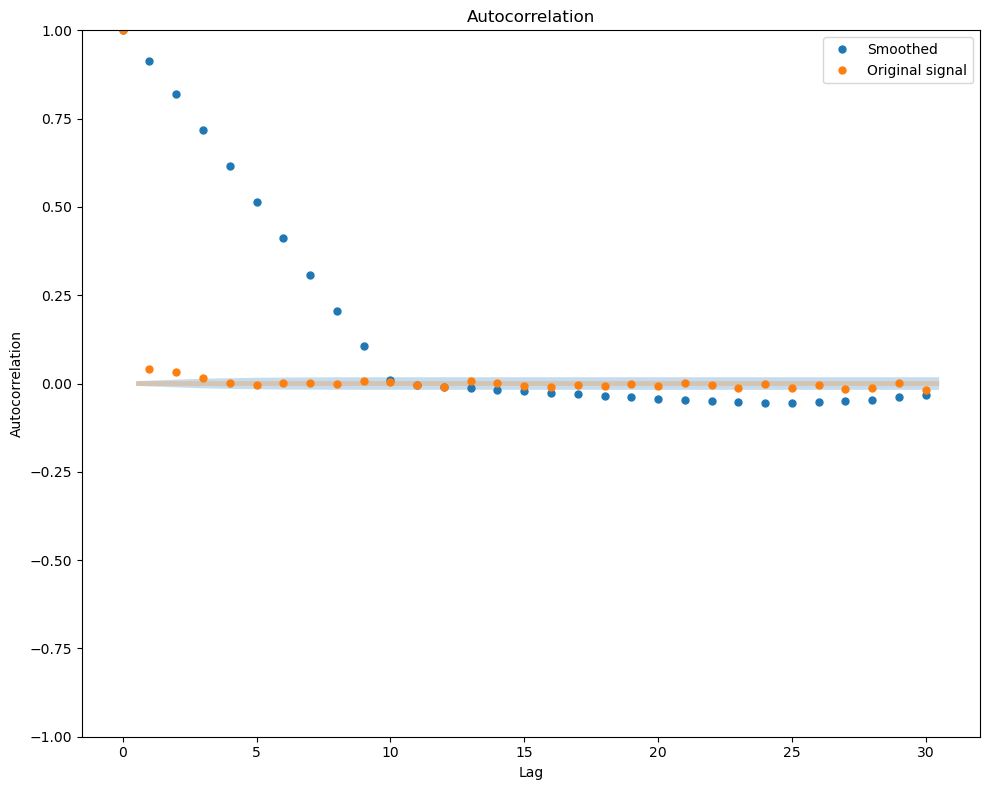

In [348]:
fig, ax = plt.subplots(figsize=(10, 8))

plot_acf(smoothed_signal, lags=30, ax=ax, use_vlines=False, alpha=0.5, title='Autocorrelation Functions', label = "Smoothed")
ax.set_ylabel('Autocorrelation')
ax.set_xlabel('Lag')

plot_acf(a, lags=30, ax=ax, alpha=0.5, use_vlines=False, label = "Original signal")
ax.legend()

plt.show()
